In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [27]:
with open('logs.pickle', 'rb') as fp:
    joints, targets, actions = pickle.load(fp)

In [28]:
joints_arr = np.empty((len(joints), len(joints[0])), dtype=np.float32)
targets_arr = np.empty_like(joints_arr)
actions_arr = np.empty_like(joints_arr)

keys = sorted(joints[0].keys())
for i in range(len(joints)):
    for j in range(len(keys)):
        joints_arr[i, j] = joints[i][keys[j]]
        targets_arr[i, j] = targets[i][keys[j]]
        actions_arr[i, j] = actions[i][keys[j]]

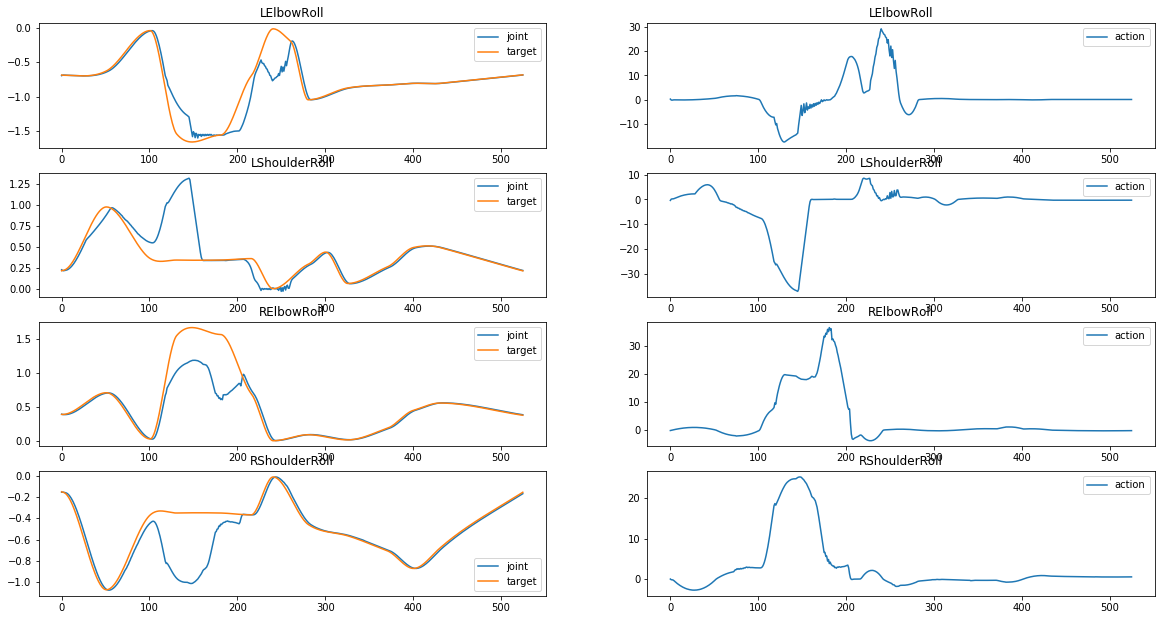

In [29]:
relevant_names = ['ShoulderRoll', 'ElbowRoll']
relevant_keys = filter(lambda k: any([n in k for n in relevant_names]), keys)
relevant_indices = map(lambda k: keys.index(k), relevant_keys)

plt.figure(figsize=(20, 15 * len(relevant_indices)))
for i in range(len(relevant_indices)):
    plt.subplot(22, 2, 2 * i + 1)
    plt.plot(joints_arr[:, relevant_indices[i]], label='joint')
    plt.plot(targets_arr[:, relevant_indices[i]], label='target')
    plt.title(keys[relevant_indices[i]])
    plt.legend()
    plt.subplot(22, 2, 2 * i + 2)
    plt.plot(actions_arr[:, relevant_indices[i]], label='action')
    plt.title(keys[relevant_indices[i]])
    plt.legend()